<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Алексей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

# Учебный Проект → «Золото» ✨

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.  
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.  
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  
Нужно:

- [Подготовить данные](#ready);
- [Провести исследовательский анализ данных](#steady);
- [Построить и обучить модель](#go);

Метрика качества  
Для решения задачи введём новую метрику качества — **sMAPE** (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).  

$$\large
sMAPE = \frac{1}{N} * \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|) / 2} * 100\%
$$

Нужно спрогнозировать сразу две величины:
  
- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`;

$$\large
sMAPE = 25\% * sMAPE_{rougher} + 75\% * sMAPE_{final}
$$

## Описание данных

Данные находятся в трёх файлах:

- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные;

### Технологический процесс

`Rougher feed` — исходное сырье  
`Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
- `Xanthate` **— ксантогенат (промотер, или активатор флотации);  
- `Sulphate` — сульфат (на данном производстве сульфид натрия);  
- `Depressant` — депрессант (силикат натрия).  

`Rougher process` (англ. «грубый процесс») — флотация  
`Rougher tails` — отвальные хвосты  
`Float banks` — флотационная установка  
`Cleaner process` — очистка  
`Rougher Au` — черновой концентрат золота  
`Final Au` — финальный концентрат золота  

<hr>

# Загружаем данные

Импортируем библиотеки 🎒

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import RandomState

from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Закомментированный код лучше удалять из проекта.</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>закомментированные удалил</li>
        <li>разделение пустой строкой сделал</li>
    </ul>
</div>

Настроим вид графиков по+красоте ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'Tahoma',
                #     'Trebuchet MS',
                #     'Arial',
                #     'Chevin'
                #     ]
                }

# rcParams.update(custom_params)

In [4]:
# set max columns to none
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

Константы.

In [5]:
RANDOM_SEED = 108108108
RANDOM_NP = RandomState(128) 
DPI_K = custom_params['figure.dpi'] / rcParams['figure.dpi']
PX = 1/custom_params['figure.dpi']

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Константы по PEP-8 пишуться в верхнем регистре - PX.</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>в верхний регистр перевёл</li>
    </ul>
</div>

Функции.

In [6]:
def baisic_df_info(data_df, title='Basic Info'):
    print(title, end='\n\n')
    print('Дубликатов:',
             len(data_df.loc[data_df.duplicated()].index),
          end='\n\n'
     )
    
    display(
        data_df.info(),
        data_df.sample(5),
        data_df.describe(),
    )

In [7]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * PX * DPI_K
        )
    )
    return px_density

In [8]:
def plot_hist(full_data_col, data, title='Histogram', custom_params=custom_params):
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=1,
            ncols=3,
            figsize=(
                to_px(960), to_px(320)),
            tight_layout=True
        )
        
        n_bins = int(len(data.index) / 100)
        to_descr  = pd.DataFrame()
        
        for n, col_name in enumerate(full_data_col):
            methal = col_name.split('_')[-1]
            to_descr[methal] = data.loc[
                    ~data[col_name].isna(),
                    col_name
                ]
            if methal == 'au':
                hist_color = 'goldenrod'
            else :
                hist_color = 'darkmagenta'
                
            axs[n].hist(
                to_descr[methal],
                bins=n_bins,
                color=hist_color
            )
            axs[n].set_xlim(0, 60)
            axs[n].set_title(methal)
        
        fig.suptitle(title, fontsize=16)

        plt.show()
        
        return to_descr

In [9]:
def plot_hist_conc(data, title='Histogram', custom_params=custom_params):
    rougher_feed = [
            'rougher.input.feed_ag',
            'rougher.input.feed_pb',
            'rougher.input.feed_sol',
            'rougher.input.feed_au',
        ]
    
    rougher_concentrate = [
            'rougher.output.concentrate_ag',
            'rougher.output.concentrate_pb',
            'rougher.output.concentrate_sol',
            'rougher.output.concentrate_au',
        ]

    final_concentrate = [
            'final.output.concentrate_ag',
            'final.output.concentrate_pb',
            'final.output.concentrate_sol',
            'final.output.concentrate_au',
        ]
    
    rf = data.loc[: ,
                     rougher_feed
                ].dropna(axis=0).apply(sum, axis=1)
    rc = data.loc[: ,
                    rougher_concentrate
                ].dropna(axis=0).apply(sum, axis=1)
    fc = data.loc[: ,
                    final_concentrate
                ].dropna(axis=0).apply(sum, axis=1)
    
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=1,
            ncols=3,
            figsize=(
                to_px(960), to_px(320)),
            tight_layout=True
        )
        
        n_bins = int(len(data.index) / 100)
        
        axs[0].hist(
            x=rf,
            bins=n_bins,
            color='forestgreen',
        )
        axs[0].set_xlim(0, 90)
        axs[0].set_title('Feed')
        
        axs[1].hist(
            x=rc,
            bins=n_bins,
            color='forestgreen',
        )
        axs[1].set_xlim(0, 90)
        axs[1].set_title('Rougher')
        
        axs[2].hist(
            x=fc,
            bins=n_bins,
            color='forestgreen',
        )
        axs[2].set_xlim(0, 90)
        axs[2].set_title('Final')
        
        fig.suptitle(title, fontsize=16)

        plt.show()
    
    return (rf, rc, fc)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>В задании требуется следующее:<br>
Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.<br>
в сырье — это столбцы rougher.input.feed_<br>
в черновом концентрате  - это столбцы rougher.output.concentrate_<br>
в финальном концентрате - это столбцы final.output.concentrate_</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <span>теперь смотрим концентрацию в:</span>
    <ul>
        <li>rougher.input.feed_</li>
        <li>rougher.output.concentrate_</li>
        <li>final.output.concentrate_</li>
    </ul>
</div>

In [10]:
def plot_feed_size_hist(data_train, data_test, title='Histogram', custom_params=custom_params):
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=1,
            ncols=2,
            figsize=(
                to_px(1024), to_px(512)),
            tight_layout=True
        )
        
        n_bins = 1_000
        n_bins_train = int(len(data_train.index) / 100)
        n_bins_test = int(len(data_test.index) / 100)
     
        axs[0].hist(
            data_train.loc[~data_train.isna()],
            bins=n_bins,
            color='forestgreen',
            density=True,
        )
        axs[0].set_xlim(0, 500)
        axs[0].set_title('Train')
        
        axs[1].hist(
            data_test.loc[~data_test.isna()],
            bins=n_bins,
            color='forestgreen',
            density=True,
        )
        axs[1].set_xlim(0, 500)
        axs[1].set_title('Test')
        
        fig.suptitle(title, fontsize=16)

        plt.show()

<hr>

$$\large
recovery = \frac {C * (F - T) }{F * (C -T)} * 100\%
$$

где:

- C — `rougher.output.concentrate_au` доля золота в концентрате после флотации/очистки;
- F — `rougher.input.feed_au` доля золота в сырье/концентрате до флотации/очистки;
- T — `rougher.output.tail_au` доля золота в отвальных хвостах после флотации/очистки;

In [11]:
def calc_recovery(concentrate_au, feed_au, tail_au):
    c = concentrate_au
    f = feed_au
    t = tail_au
    
    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    
    return recovery

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

<hr>

<a id='ready'></a>
## 1. Подготовим данные

### 1.1. Загрузим файлы и изучим данные.

> Данные индексируются датой и временем получения информации (признак date)

In [12]:
try:
    gold_recovery_train = pd.read_csv(
        './datasets/gold_recovery_train_new.csv',
        index_col='date',
    )
    gold_recovery_test = pd.read_csv(
        './datasets/gold_recovery_test_new.csv',
        index_col='date',
    )
    gold_recovery_full = pd.read_csv(
        './datasets/gold_recovery_full_new.csv',
        index_col='date',
    )
    
except FileNotFoundError:
    gold_recovery_train = pd.read_csv(
        'https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv',
        index_col='date',
    )
    gold_recovery_test = pd.read_csv(
        'https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv',
        index_col='date',
    )
    gold_recovery_full = pd.read_csv(
        'https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv',
        index_col='date',
    )
    print('FYI datasets loaded via url')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Классно, что сразу объявляешь 'date' индексом.</font>

In [13]:
gold_recovery_train.index = pd.to_datetime(gold_recovery_train.index)
gold_recovery_test.index = pd.to_datetime(gold_recovery_test.index)
gold_recovery_full.index = pd.to_datetime(gold_recovery_full.index)

In [14]:
baisic_df_info(gold_recovery_train, 'Обучающая Выборка')

Обучающая Выборка

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.o

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-16 13:59:59,6.893852,10.821085,8.007053,40.637795,53.686857,7.753593,2.772998,7.269920,3.075697,40.879093,2.489611,6.98,0.189424,7.653364,7.936591,3.560400,33.788397,15.292168,2.335833,3.693126,3.630402,1733.731582,-502.099594,1517.223871,-500.091008,1750.808585,-503.154091,1750.332011,-505.847094,45932.485699,16821.247991,502.535148,1.959425,7.217216,3.115927,206.682749,146.233556,NaN,6.105425,21.997819,4.798829,0.648013,0.217505,10.601826,7.840312,28.171976,18.565025,70.486425,6.010477,1.028344,18.882110,2.345671,1001.385745,-297.512767,1592.784780,-306.144950,1588.438455,-331.625460,1511.488630,-319.861547,1389.212229,-317.796255,1374.540270,-324.991669,16.471980,7.485213,NaN,4.636400,NaN,-499.440519,27.091272,-499.983225,24.974851,-501.872896,19.988481,-500.285490,21.981491,-503.346275,15.025710,-380.074230,18.028261,-501.934904,12.980097,-500.064708,14.984684,-499.746756
2018-07-12 13:59:59,3.144395,10.853107,6.775085,46.825606,55.805495,9.488883,5.053756,8.3

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [15]:
baisic_df_info(gold_recovery_test, 'Тестовая Выборка')

Тестовая Выборка

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-19 10:59:59,217.317218,9.958041,6.50,2.899405,1698.960271,-500.595337,1699.203684,-502.303321,1646.818705,-499.842527,1701.511219,-500.074092,9.644483,5.854174,520.704021,58.324471,40.410281,11.517781,15.998492,7.301307,15.998950,7.300988,995.044760,-299.988079,1144.145311,-499.893940,1100.819703,-499.525394,1050.392630,-500.229678,950.580868,-500.007260,948.244015,-499.633246,27.994280,-513.309718,25.932459,-521.348059,25.034179,-468.369150,22.977845,-480.130485,17.985786,-494.911546,15.977732,-400.224173,12.964823,-495.554477,10.032099,-499.921197,13.994447,-498.542953
2017-12-07 20:59:59,201.152562,9.989486,6.60,1.449187,1552.256467,-500.578056,1548.885313,-502.500668,1553.240402,-499.121514,1548.908881,-499.402231,10.394824,3.325029,652.387278,83.444822,45.501282,9.027389,15.141071,8.202531,15.143391,8.195637,999.185109,-399.958041,1200.243520,-499.359726,1202.974979,-499.537339,1007.501731,-499.608518,1000.129367,-499.800416,899.924329,-499.514979,24.977951,-500.387218,20.065672,-499.959236,30.012619,-500.452431,17.969319,-499.991051,19.998185,-501.117191,14.953545,-149.708246,10.943096,-501.924566,9.055845,-500.555108,14.999221,-501.248817
2017-11-28 01:59:59,224.989734,11.000983,7.09,1.666876,1602.505488,-498.948071,1603.095007,-500.307088,1600.352023,-501.459118,1599.253776,-499.823495,12.107756,6.166963,559.079574,61.295804,40.234677,11.500625,17.177395,7.996875,17.178733,7.995787,1201.457009,-399.979765,999.232302,-500.015850,999.793596,-500.174716,804.723882,-500.436054,798.997017,-500.748968,699.692154,-500.103640,28.046943,-500.092550,23.970571,-499.757805,25.026712,-499.870728,19.999231,-500.065160,17.043718,-500.717158,15.087452,-500.295914,10.958956,-500.760155,8.988825,-499.710449,16.008226,-499.788998
2017-09-09 03:59:59,145.003663,4.502152,6.75,1.394672,1599.308854,-500.272601,1601.095331,-500.972630,1601.558893,-499.489495,1598.904811,-499.657835,6.072170,3.701293,549.431398,67.545437,37.305677,6.473587,14.999579,5.998224,14.998206,5.999032,1003.900752,-299.944094,1303.375585,-499.583778,1252.042012,-499.6

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [16]:
baisic_df_info(gold_recovery_full, 'Исходные Данные')

Исходные Данные

Дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.out

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-16 12:59:59,6.029449,9.719397,11.198193,42.740909,68.000257,12.141409,2.269972,10.620620,3.365574,154.300821,11.982983,8.13,0.768127,9.873474,8.336394,18.297788,33.184232,18.490934,3.925825,7.904926,5.875409,1303.201214,-498.418426,1299.623619,-500.591564,1299.877641,-500.495572,1301.785447,-500.846152,48081.830359,2776.427144,2775.998519,3.084695,10.324330,2.920827,452.148089,47.225520,31.116756,9.009862,10.999542,5.000757,10.991298,4.996869,14.571156,6.258088,33.957652,23.024022,80.383312,7.058704,0.568605,15.428910,2.578541,1000.639331,-500.111671,1200.338709,-500.318580,1203.087156,-499.425644,1099.916843,-497.730038,1001.472096,-499.659492,951.608414,-500.857580,19.159394,3.783303,12.644519,4.999623,25.974839,-500.092816,24.032151,-499.915286,25.042108,-500.118694,21.971511,-500.152963,9.984079,-499.807547,8.053153,-499.261113,9.044199,-498.538170,6.038717,-499.979414,20.018825,-499.637722
2018-03-23 06:59:59,4.743066,11.790198,7.287018,45.402100,74.094404,9.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

In [17]:
to_plot = (
    (
        'rougher.input.feed_ag',
        'rougher.input.feed_pb',
        'rougher.input.feed_au',
    ),
    (
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb',
        'rougher.output.concentrate_au',
    ) ,
    (
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb',
        'primary_cleaner.output.concentrate_au',
    ),
    (
        'final.output.concentrate_ag',
        'final.output.concentrate_pb',
        'final.output.concentrate_au',
    ),
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### 1.2. Проверим, что эффективность обогащения рассчитана правильно

In [18]:
print(
    'Строк в тренировочной выборке:',
    len(gold_recovery_train.index)
)

Строк в тренировочной выборке: 14149


In [19]:
display(
    gold_recovery_train['rougher.output.recovery'].notna().sum(),
    gold_recovery_train['rougher.output.concentrate_au'].notna().sum(),
    gold_recovery_train['rougher.input.feed_au'].notna().sum(),
    gold_recovery_train['rougher.output.tail_au'].notna().sum(),
)

14149

14149

14149

14149

Данные для вычислений на месте)

####  Вычислим эффективность обогащения на `train` выборке для признака `rougher.output.recovery`

$$\large
recovery_{train} = \frac {C * (F - T) }{F * (C -T)} * 100\%
$$

где:

- C — `rougher.output.concentrate_au` доля золота в концентрате после флотации;
- F — `rougher.input.feed_au` доля золота в сырье/концентрате до флотации;
- T — `rougher.output.tail_au` доля золота в отвальных хвостах после флотации;

In [20]:
gold_recovery_train['rougher.calculation.recovery'] = gold_recovery_train.loc[:, 
        ['rougher.output.concentrate_au',
        'rougher.input.feed_au',
        'rougher.output.tail_au',]
    ].apply(lambda to_calc:
            calc_recovery(
                to_calc['rougher.output.concentrate_au'],
                to_calc['rougher.input.feed_au'],
                to_calc['rougher.output.tail_au']
            ),
            axis=1
    )

In [21]:
display(
    gold_recovery_train.loc[: ,
        ['rougher.calculation.recovery', 'rougher.output.recovery']
    ].sample(5)
)

,rougher.calculation.recovery,rougher.output.recovery
date,,
2016-05-16 10:59:59,81.457166,81.457166
2016-05-29 15:59:59,78.643655,78.643655
2018-07-11 19:59:59,92.887371,92.887371
2017-01-24 11:59:59,89.324084,89.324084
2018-03-27 04:59:59,86.878888,86.878888


####  Найдём MAE между расчётами и значением признака

$$\large
MAE = \frac{1}{N} * \sum_{i=1}^{N} |y_i - x_i|
$$

In [22]:
print(
    'MAE между расчётами и значением признака rougher.output.recovery',
    mean_absolute_error(
        gold_recovery_train['rougher.output.recovery'],
        gold_recovery_train['rougher.calculation.recovery'],
    ),
    sep=':\n'
)

MAE между расчётами и значением признака rougher.output.recovery:
9.73512347450521e-15


In [23]:
display(
    gold_recovery_train.loc[
        gold_recovery_train['rougher.output.recovery'] != gold_recovery_train['rougher.calculation.recovery'],
        ['rougher.output.recovery', 'rougher.calculation.recovery']
    ].sample(7)
)

,rougher.output.recovery,rougher.calculation.recovery
date,,
2017-05-02 14:59:59,83.535356,83.535356
2018-04-04 08:59:59,88.072665,88.072665
2017-05-24 03:59:59,84.106632,84.106632
2016-08-23 23:59:59,76.025956,76.025956
2018-03-11 22:59:59,89.980583,89.980583
2016-08-02 01:59:59,69.764449,69.764449
2018-04-27 05:59:59,92.638461,92.638461


####  Выводы

MAE, конечно, довольно мало, но вот вопрос как это $MAE \neq 0$ !?  
Похоже, дело в `python` и его бинарной особенности в работе с `float`..🐍

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [24]:
train_rougher_calculation_recovery = gold_recovery_train['rougher.calculation.recovery'] 

gold_recovery_train.drop(
    'rougher.calculation.recovery',
    axis=1,
    inplace=True,
)

### 1.3. Проанализируем признаки, недоступные в тестовой выборке.

> Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  

> В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

####  Что это за параметры?

In [25]:
not_in_test = list(
        set(gold_recovery_train.columns)
        - set(gold_recovery_test.columns)
    )

In [26]:
PHASE_ORDER = {
    'rougher': 'a',
    'primary_cleaner': 'b',
    'secondary_cleaner': 'c',
    'final': 'd',
}

TYPE_ORDER = {
    'input': 'a',
    'output': 'b',
    'state': 'c',
    'calculation': 'd',
}

In [27]:
def to_process_order(col_name):
    order = PHASE_ORDER[col_name.split('.')[0]] + TYPE_ORDER[col_name.split('.')[1]] + col_name.split('.')[2]
    return order

In [28]:
train_test_col = pd.DataFrame(
        sorted(
            gold_recovery_train.columns,
            key=lambda col: to_process_order(col)
        ),
        columns=['train']
    )

train_test_col['test'] = train_test_col['train'].apply(
        lambda col: col if col in set(gold_recovery_test.columns) else ''
    )

display(
    train_test_col
)

,train,test
0,rougher.input.feed_ag,rougher.input.feed_ag
1,rougher.input.feed_au,rougher.input.feed_au
2,rougher.input.feed_pb,rougher.input.feed_pb
3,rougher.input.feed_rate,rougher.input.feed_rate
4,rougher.input.feed_size,rougher.input.feed_size
5,rougher.input.feed_sol,rougher.input.feed_sol
6,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_sulfate
7,rougher.input.floatbank10_xanthate,rougher.input.floatbank10_xanthate
8,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_sulfate
9,rougher.input.floatbank11_xanthate,rougher.input.floatbank11_xanthate


#### К какому типу относятся?

В тестовой выборке нет данных с типом параметра:  
`'calculation'`  
`'output'`  
  
С `'calculation'` понятно, что если оставить в `train` эти параметры, то они приведут с собой `Мультиколлинеарность` 👫.  
  
С `'output'` параметрами интереснее, потомучто золотая часть из них учавствует в расчете `recovery`.  
То есть мы их и собираемся предсказывать, точнее предсказывать будем `recovery`. А в формулу `recovery` входят `output.concentrate_au` и `output.tail_au`..

> Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.  
  
Модель ждать не будет 💃

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

#### 1.4. Проведите предобработку данных

Добавим в `test` выборку целевые признаки из выборки `full`.

In [29]:
gold_recovery_test.loc[: ,
        ['rougher.output.recovery', 'final.output.recovery',]
    ] = gold_recovery_full.loc[
            gold_recovery_test.index,
            ['rougher.output.recovery', 'final.output.recovery',]
        ]

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Уберём из `train` выборки все признаки, которых нет в `test` выборке.

In [30]:
not_in_test = list(
        set(gold_recovery_train.columns)
        - set(gold_recovery_test.columns)
    )

In [31]:
gold_recovery_train.drop(
    labels=not_in_test,
    axis=1,
    inplace=True,
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

> Соседние по времени параметры часто похожи.

Заполним пропуски в данных предыдущими значениями по методу `ffill`:  
> propagate last valid observation forward to next

хотя, медиана между значениями лучше бы подошла, странно что такого метода нет..

In [32]:
gold_recovery_train.sort_index(
    axis=0,
    inplace=True,
)

gold_recovery_train.fillna(
    method='ffill',
    inplace=True,
)

In [33]:
gold_recovery_test.sort_index(
    axis=0,
    inplace=True,
)

gold_recovery_test.fillna(
    method='ffill',
    inplace=True,
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

Отсортируем колонки по этапам обработки.

In [34]:
gold_recovery_train = gold_recovery_train.reindex(
    labels=sorted(
        gold_recovery_train.columns,
        key=lambda col: to_process_order(col),
    ),
    axis=1,
)

In [35]:
gold_recovery_test = gold_recovery_test.reindex(
    labels=sorted(
        gold_recovery_test.columns,
        key=lambda col: to_process_order(col),
    ),
    axis=1,
)

In [36]:
display(
    gold_recovery_train.info(),
    gold_recovery_test.info(),
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_ag                       14149 non-null  float64
 1   rougher.input.feed_au                       14149 non-null  float64
 2   rougher.input.feed_pb                       14149 non-null  float64
 3   rougher.input.feed_rate                     14149 non-null  float64
 4   rougher.input.feed_size                     14149 non-null  float64
 5   rougher.input.feed_sol                      14149 non-null  float64
 6   rougher.input.floatbank10_sulfate           14149 non-null  float64
 7   rougher.input.floatbank10_xanthate          14149 non-null  float64
 8   rougher.input.floatbank11_sulfate           14149 non-null  float64
 9   rougher.input.floatbank11_xanthate          1414

None

None

In [37]:
display(
    list(gold_recovery_train.columns),
)

['rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floa

<hr>

<a id='steady'></a>
## 2. Проанализируйте данные

In [38]:
def descr_methals(metals_df, phase_title, perc=[.005, .025,  .5, .975, .995]):
    print(phase_title)
    display(
        pd.DataFrame(
            data=np.reshape(
                metals_df.describe(percentiles=perc).values,
                [-1, 4]
            ),
            index=metals_df.describe(percentiles=perc).index,
            columns=metals_df.columns
        )
    )

### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

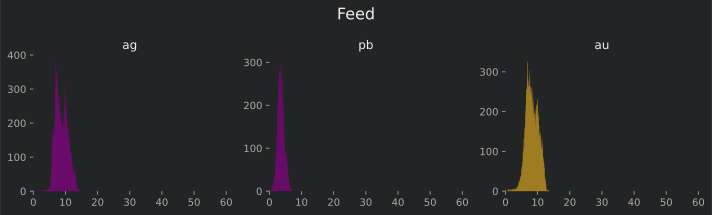

In [39]:
frm = plot_hist(to_plot[0], gold_recovery_full, 'Feed')

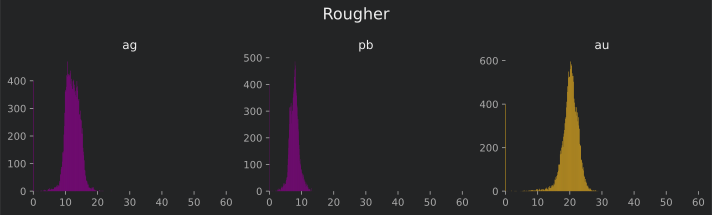

In [40]:
rm = plot_hist(to_plot[1], gold_recovery_full, 'Rougher')

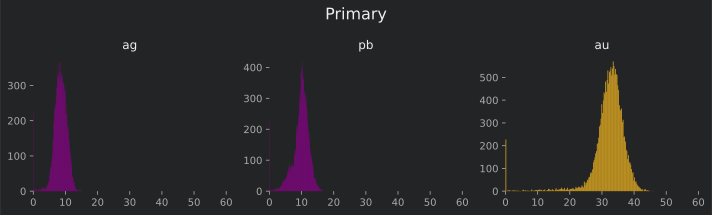

In [41]:
pm = plot_hist(to_plot[2], gold_recovery_full, 'Primary')

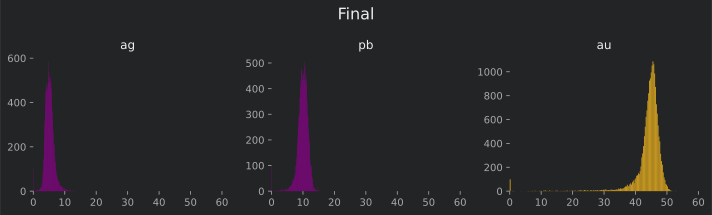

In [42]:
fm = plot_hist(to_plot[3], gold_recovery_full, 'Final')

In [43]:
descr_methals(pd.DataFrame(pd.concat(
            [frm['pb'].rename('feed_pb'),
                rm['pb'].rename('rougher_pb'),
                pm['pb'].rename('primary_pb'),
                fm['pb'].rename('final_pb'),],
            axis=1,)),
    phase_title='Свинец, концентрация'
)

Свинец, концентрация


,feed_pb,rougher_pb,primary_pb,final_pb
count,19339.000000,19439.000000,19323.000000,19438.000000
mean,3.598085,7.606272,9.829530,9.978895
std,1.049486,1.796757,2.556843,1.669240
min,0.010000,0.000000,0.000000,0.000000
0.5%,0.933012,0.000000,0.000000,0.001850
2.5%,1.649863,3.489990,3.678817,6.518952
50%,3.534895,7.742580,10.152433,10.102433
97.5%,5.791383,10.916063,14.029533,12.673041
99.5%,6.313100,11.989667,15.258920,13.524733
max,7.142594,13.617072,17.081278,17.031899


In [44]:
descr_methals(pd.DataFrame(pd.concat(
            [frm['ag'].rename('feed_ag'),
                rm['ag'].rename('rougher_ag'),
                pm['ag'].rename('primary_ag'),
                fm['ag'].rename('final_ag'),],
            axis=1,)),
    phase_title='Серебро, концентрация'
)

Серебро, концентрация


,feed_ag,rougher_ag,primary_ag,final_ag
count,19439.000000,19439.000000,19439.000000,19438.000000
mean,8.794927,11.994759,8.442408,5.168470
std,1.936847,2.733862,2.054465,1.372348
min,0.010000,0.000000,0.000000,0.000000
0.5%,4.692674,0.000000,0.000000,0.001850
2.5%,5.744728,5.573315,4.140096,3.046687
50%,8.593574,12.098115,8.507298,5.066094
97.5%,12.752663,16.150374,11.946014,8.259669
99.5%,13.397962,18.188382,12.860209,10.170913
max,14.596026,24.480271,16.081632,16.001945


In [45]:
descr_methals(pd.DataFrame(pd.concat(
            [frm['au'].rename('rougher_au'),
                rm['au'].rename('rougher_au'),
                pm['au'].rename('primary_au'),
                fm['au'].rename('final_au'),],
            axis=1,)),
    phase_title='Золото, концентрация'
)

Золото, концентрация


,rougher_au,rougher_au,primary_au,final_au
count,19439.000000,19439.000000,19439.000000,19438.000000
mean,8.266097,19.772000,32.119400,44.077287
std,1.955092,3.753600,5.627611,5.128779
min,0.010000,0.000000,0.000000,0.000000
0.5%,2.518184,0.000000,0.000000,0.001850
2.5%,4.676810,9.901529,17.090707,32.592658
50%,8.125839,20.280214,32.841295,45.011348
97.5%,11.907210,24.374156,39.460115,48.816373
99.5%,12.451872,25.720501,41.458570,49.969677
max,13.731330,28.824507,45.933934,52.756638


#### Выводы о концентрации Pb, Ag, Au 

Медиана концентрации Свинца `Pb` увеличивается с 7,7% после Флотации и далее остаётся около 10,1%.  
Медиана концентрации Серебра `Ag` снижается с 12% после Флотации до 5% после Финальной отчистки.  
Медиана концентрации Золота `Au` увеличивается скаждым этапом с 20,3% до 45%.  
    Это радует, мы ведь Золото добываем)  
  
Интересно, что стандартное отклонение увеличивается с 3,8 до 5,6 (5,1), несмотря на сужение гистограмы концентрации золота. В левой части гистограмы всё ещё много выбросов за 95% интервал.  
  
Хотя природа появления нулевых концентраций не известна (ошибки в данных, ошибки в замерах или ..), но количество нулевых концентраций всех металлов снижается по мере отчистки.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Можно ещё посмотреть начальные концентрации `rougher.input.feed_{металл}`</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <br/><span>Хорошая идея 💡</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Добавил <code>feed</code> столбцы</li>
    </ul>
</div>

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

In [46]:
display(
    gold_recovery_train['rougher.input.feed_size'].describe(),
    gold_recovery_test['rougher.input.feed_size'].describe(),
)

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

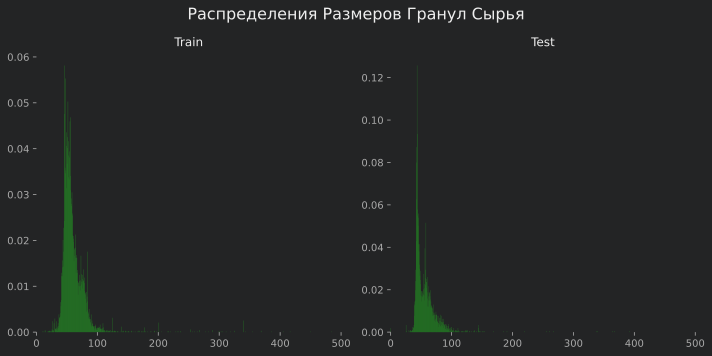

In [47]:
plot_feed_size_hist(
    gold_recovery_train['rougher.input.feed_size'],
    gold_recovery_test['rougher.input.feed_size'],
    'Распределения Размеров Гранул Сырья'
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.
</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Добавил <code>density=True</code> в метод <code>.hist()</code></li>
    </ul>
</div>

Посмотрим на 99% доверительные интервалы для выборок `test` и `train` параметра `rougher.input.feed_size`

In [48]:
print(
    'Train',
    round(gold_recovery_train[
            'rougher.input.feed_size'
        ].quantile(0.005), 5),
    round(gold_recovery_train[
            'rougher.input.feed_size'
        ].quantile(0.5), 5),
    round(gold_recovery_train[
            'rougher.input.feed_size'
        ].quantile(0.995), 5),
    sep='\n\t',
)
print(
    'Test',
    round(
        gold_recovery_test[
            'rougher.input.feed_size'
        ].quantile(0.005), 5),
    round(gold_recovery_test[
            'rougher.input.feed_size'
        ].quantile(0.5), 5),
    round(gold_recovery_test[
            'rougher.input.feed_size'
        ].quantile(0.995), 5),
    sep='\n\t',
)

Train
	30.50522
	55.26978
	200.99543
Test
	35.77432
	50.84684
	144.45971


Выглядит как не самая `случайная` выборка.

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

`Feed`  ➡️  `Rougher`  ➡️  `Final`

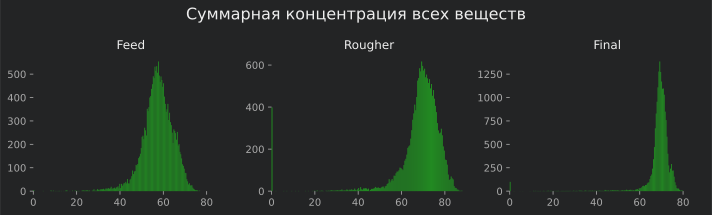

In [49]:
fr, rc, fc = plot_hist_conc(
        gold_recovery_full,
        title='Cуммарная концентрация всех веществ'
    )

In [50]:
display(
    pd.DataFrame(
        data=(np.concatenate(
                (
                    np.reshape(fr.describe(
                            percentiles=[.005, .025, .25,  .5, .75, .975, .995]
                        ).values,
                        [-1, 1]
                    ),
                    np.reshape(rc.describe(
                            percentiles=[.005, .025, .25,  .5, .75, .975, .995]
                        ).values,
                        [-1, 1]
                    ),
                    np.reshape(fc.describe(
                            percentiles=[.005, .025, .25,  .5, .75, .975, .995]
                        ).values,
                        [-1, 1]
                    ),
                ),
                axis=1
            )
        ),
        index=rc.describe(percentiles=[.005, .025, .25,  .5, .75, .975, .995]).index,
        columns=['Feed', 'Rougher', 'Final']
    )
)

,Feed,Rougher,Final
count,19245.000000,19416.000000,19227.000000
mean,57.407926,68.188914,68.727562
std,7.165219,12.478522,7.423741
min,0.040000,0.000000,0.000000
0.5%,30.488598,0.000000,0.000000
2.5%,41.558753,33.969876,54.157814
25%,53.660745,66.026048,67.985659
50%,57.647093,70.186130,69.632597
75%,62.012223,74.362878,71.390461
97.5%,69.651207,81.211354,75.569975


Видно и по графикам: форма распределения сужается от этапа к этапу.  
Но вот что странно так это нулевые суммы.. Хотя колличество нулей и уменьшается примерно вдвое на каждом из шагов отчистки.

Посмотрим откуда берётся нуль..

In [51]:
display(
    gold_recovery_full.loc[
        (gold_recovery_full['rougher.output.concentrate_ag'] == gold_recovery_full['rougher.output.concentrate_pb'])
        & (gold_recovery_full['rougher.output.concentrate_pb'] == gold_recovery_full['rougher.output.concentrate_sol'])
        & (gold_recovery_full['rougher.output.concentrate_sol'] == gold_recovery_full['rougher.output.concentrate_au'])
        & (gold_recovery_full['rougher.output.concentrate_ag'] == 0),
    ].head(5),
    gold_recovery_full.loc[
        (gold_recovery_full['primary_cleaner.output.concentrate_ag'] == gold_recovery_full['primary_cleaner.output.concentrate_pb'])
        & (gold_recovery_full['primary_cleaner.output.concentrate_pb'] == gold_recovery_full['primary_cleaner.output.concentrate_sol'])
        & (gold_recovery_full['primary_cleaner.output.concentrate_sol'] == gold_recovery_full['primary_cleaner.output.concentrate_au'])
        & (gold_recovery_full['primary_cleaner.output.concentrate_ag'] == 0),
    ].head(5),
    gold_recovery_full.loc[
        (gold_recovery_full['final.output.concentrate_ag'] == gold_recovery_full['final.output.concentrate_pb'])
        & (gold_recovery_full['final.output.concentrate_pb'] == gold_recovery_full['final.output.concentrate_sol'])
        & (gold_recovery_full['final.output.concentrate_sol'] == gold_recovery_full['final.output.concentrate_au'])
        & (gold_recovery_full['final.output.concentrate_ag'] == 0),
    ].head(5),
)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,13.969457,7.25,1.203034,8.513177,9.724797,19.120964,37.633572,16.455383,3.366501,6.864404,3.434734,1601.674776,-500.285160,1600.151967,-499.633542,1599.542959,-499.495721,1599.342687,-500.360306,41359.061159,3196.130244,3205.717062,2.530283,7.521974,2.811569,581.605260,65.620714,41.154430,7.114065,13.322740,7.504592,13.311361,7.493738,0.0,0.0,0.0,0.0,0.0,4.784398,0.818965,20.046797,1.939811,999.026619,-499.850895,1600.614880,-500.331775,1598.654561,-500.364377,1398.394100,-501.540155,1197.182011,-500.205806,1198.542180,-499.648335,13.605154,4.983564,9.545239,3.102137,25.963860,-498.097243,23.896954,-500.047419,24.963926,-500.207267,23.984937,-500.613261,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,149.998260,12.509947,7.25,0.997030,0.0,0.0,0.0,0.0,14.915949,2.702527,7.784534,2.013487,1599.617983,-499.527131,1599.389604,-499.554869,1600.441370,-500.503609,1601.900702,-500.129123,41959.818540,3507.941540,3499.552368,2.448851,6.046063,2.777324,571.766992,62.823127,40.381002,6.801254,14.812266,7.064468,14.814722,7.064408,10.788951,7.537074,26.092838,18.511902,86.241795,4.919573,0.739863,20.309714,1.369732,999.708593,-400.075046,1600.639292,-450.110961,1602.333794,-450.673170,1600.427078,-449.633484,1401.859581,-448.145152,1400.906088,-451.771497,12.708557,4.565723,9.997717,2.138772,25.999540,-500.152462,24.013000,-500.297031,24.022240,-499.329964,24.012891,-499.923981,14.001632,-509.808331,12.087669,-510.782166,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776
2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.3

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,133.610147,14.032789,7.32,1.550190,8.986696,6.530607,11.969464,26.238846,13.854131,2.156414,8.174442,1.965728,1800.648807,-349.517991,1799.347332,-350.925554,1798.833149,-349.609813,1456.714168,-350.518404,45778.313924,2952.203313,2943.136954,2.894754,7.407737,1.934178,500.087438,51.965198,31.762853,5.598971,10.251319,6.620908,10.259054,6.620118,11.803589,7.143475,21.692525,15.935190,68.960993,5.114923,0.925673,20.699912,2.293607,999.884600,-499.972731,1499.290173,-399.546180,1499.161769,-398.630471,1499.040323,-399.389036,1501.877151,-397.227473,1501.061312,-400.602849,11.838086,3.905472,10.651508,2.283842,32.054894,-400.832639,30.998499,-401.051170,30.900779,-400.953348,29.003189,-401.031397,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,111.502432,11.9278

Если `concentrate` это расчётные значения, то похоже что калькулятор барахлил.. 🧮

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Верно. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из **обучающих** данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Уже удаляю строки с нулями концентратами из <code>train</code>)</li>
    </ul>
</div>

In [52]:
rough_zero_conc_indx = gold_recovery_full.loc[
            (gold_recovery_full['rougher.output.concentrate_ag'] == gold_recovery_full['rougher.output.concentrate_pb'])
            & (gold_recovery_full['rougher.output.concentrate_pb'] == gold_recovery_full['rougher.output.concentrate_sol'])
            & (gold_recovery_full['rougher.output.concentrate_sol'] == gold_recovery_full['rougher.output.concentrate_au'])
            & (gold_recovery_full['rougher.output.concentrate_ag'] == 0),
        ].index
prime_zero_conc_indx = gold_recovery_full.loc[
            (gold_recovery_full['primary_cleaner.output.concentrate_ag'] == gold_recovery_full['primary_cleaner.output.concentrate_pb'])
            & (gold_recovery_full['primary_cleaner.output.concentrate_pb'] == gold_recovery_full['primary_cleaner.output.concentrate_sol'])
            & (gold_recovery_full['primary_cleaner.output.concentrate_sol'] == gold_recovery_full['primary_cleaner.output.concentrate_au'])
            & (gold_recovery_full['primary_cleaner.output.concentrate_ag'] == 0),
        ].index
final_zero_conc_indx = gold_recovery_full.loc[
            (gold_recovery_full['final.output.concentrate_ag'] == gold_recovery_full['final.output.concentrate_pb'])
            & (gold_recovery_full['final.output.concentrate_pb'] == gold_recovery_full['final.output.concentrate_sol'])
            & (gold_recovery_full['final.output.concentrate_sol'] == gold_recovery_full['final.output.concentrate_au'])
            & (gold_recovery_full['final.output.concentrate_ag'] == 0),
        ].index

In [53]:
display(
    len(rough_zero_conc_indx)
    + len(prime_zero_conc_indx)
    + len(final_zero_conc_indx)
)

600

In [54]:
indx_full_zero_conc  = rough_zero_conc_indx.union(prime_zero_conc_indx).union(final_zero_conc_indx)

indx_train_zero_conc  = gold_recovery_train.loc[
        gold_recovery_train.index.isin(indx_full_zero_conc)
    ].index

gold_recovery_train.drop(
    index=indx_train_zero_conc,
    inplace=True
)

In [55]:
display(
    len(gold_recovery_train.index)
)

13725

Удалим выбросы, оставим 99,9% интервал

In [56]:
def trim_outliers(df, q_min, q_max):
    quantile_df = df.quantile(q=[q_min, q_max])
    col_to_trim = list(set(df.columns) - set(['rougher.output.recovery', 'final.output.recovery']))
    for col_name in col_to_trim:
        df = df.loc[
            (df[col_name] > quantile_df.loc[q_min, col_name])
            & (df[col_name] < quantile_df.loc[q_max, col_name])
        ]
    return df

In [57]:
display(
    len(trim_outliers(gold_recovery_train, .0005, .9995))
)

13132

In [58]:
gold_recovery_train = trim_outliers(gold_recovery_train, .0005, .9995)

<hr>

<a id='go'></a>
## 3. Постройте модель

Отделим флотацию от остальных этапов.

In [59]:
rougher_col = pd.Series(gold_recovery_train.columns).apply(
        lambda col: col if 'rougher.' in col else None
    ).dropna()

In [60]:
target_rougher_train = gold_recovery_train['rougher.output.recovery']
features_rougher_train = gold_recovery_train[
        rougher_col
    ].drop(
        columns='rougher.output.recovery',
    )

In [61]:
target_rougher_test = gold_recovery_test['rougher.output.recovery']
features_rougher_test = gold_recovery_test[
        rougher_col
    ].drop(
        columns='rougher.output.recovery',
    )

In [62]:
features_rougher_train.describe()

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
count,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000
mean,8.566404,7.850253,3.497878,478.378420,60.151585,36.398605,11.713055,5.905172,11.369040,5.857834,1124.996444,-370.176684,1323.322312,-463.982238,1301.705925,-464.809778,1213.411917,-465.185270,1086.179091,-464.635163,1037.520978,-464.519718
std,1.871080,1.902920,1.081411,99.075510,21.043603,4.805695,3.096253,1.036557,3.568369,1.176135,167.158798,94.013516,179.092028,57.159859,208.754080,55.573351,207.167646,55.265655,183.478041,56.035855,172.643461,56.032053
min,1.612745,0.714036,0.125889,0.110679,19.348609,4.592246,0.354784,0.016077,0.001973,0.000953,499.767630,-600.544370,849.848753,-551.369944,849.698911,-552.372163,760.163029,-582.196480,696.188161,-592.234699,696.622570,-580.414579
25%,7.122874,6.582795,2.766254,430.420172,49.297328,34.130545,9.860366,5.199041,9.533096,5.193253,999.804246,-499.799627,1199.483502,-500.178546,1103.409902,-500.207112,1061.335648,-500.352532,952.592418,-500.243795,901.682170,-500.471611
50%,8.142059,7.627226,3.402755,499.914738,55.545158,37.052247,11.652727,5.996866,11.369259,5.997774,1001.732629,-300.178219,1301.730148,-499.758704,1300.462043,-499.675052,1200.985614,-499.458853,1050.330826,-499.605848,1000.106681,-499.362219
75%,9.917836,9.057321,4.207280,548.247047,66.221228,39.474323,13.499748,6.685790,13.354391,6.699041,1299.443357,-299.964281,1449.566119,-400.386087,1450.393911,-400.621419,1348.120386,-400.975304,1199.958105,-400.576731,1100.234082,-400.981187
max,14.088550,12.738386,6.721651,658.228082,355.059567,47.307449,30.004523,9.308612,30.007855,9.309852,1506.751818,-295.545977,1802.020683,-298.488688,2499.122165,-298.461213,1799.045860,-297.054364,1700.253198,-298.028814,1699.470315,-296.074310


Проверим на мультиколлинеарность.

Посмотрим на коэффициент корреляции Пирсона. Между параметрами флотации.

In [63]:
rougher_corr = features_rougher_train.corr().abs().unstack().sort_values().drop_duplicates()

display(
    rougher_corr[
        (rougher_corr > 0.5)
        & (rougher_corr < 1.0)
    ]
)

rougher.state.floatbank10_c_air     rougher.state.floatbank10_c_level     0.500228
rougher.input.feed_sol              rougher.input.feed_rate               0.559838
rougher.input.feed_rate             rougher.input.floatbank10_xanthate    0.574929
rougher.state.floatbank10_a_air     rougher.state.floatbank10_a_level     0.580566
rougher.input.floatbank11_xanthate  rougher.input.feed_rate               0.637076
rougher.input.feed_pb               rougher.input.feed_au                 0.692214
rougher.state.floatbank10_c_air     rougher.state.floatbank10_f_air       0.757012
                                    rougher.state.floatbank10_e_air       0.785840
rougher.input.floatbank10_sulfate   rougher.input.floatbank11_sulfate     0.803247
rougher.state.floatbank10_f_air     rougher.state.floatbank10_b_air       0.818644
rougher.state.floatbank10_e_air     rougher.state.floatbank10_b_air       0.832970
rougher.input.feed_au               rougher.input.feed_ag                 0.841399
roug

In [64]:
rougher_floatbank10_levels = [
            'rougher.state.floatbank10_a_level',
            'rougher.state.floatbank10_b_level',
            'rougher.state.floatbank10_c_level',
            'rougher.state.floatbank10_d_level',
            'rougher.state.floatbank10_e_level',
            'rougher.state.floatbank10_f_level',
        ]

rougher_floatbank10_airs = [
            'rougher.state.floatbank10_a_air',
            'rougher.state.floatbank10_b_air',
            'rougher.state.floatbank10_c_air',
            'rougher.state.floatbank10_d_air',
            'rougher.state.floatbank10_e_air',
            'rougher.state.floatbank10_f_air',
        ]

rougher_input_floatbanks_sulfate_mean = [
            'rougher.input.floatbank10_sulfate',
            'rougher.input.floatbank11_sulfate',
        ]

rougher_input_floatbanks_xanthate_mean = [
            'rougher.input.floatbank10_xanthate',
            'rougher.input.floatbank11_xanthate',
        ]

In [65]:
primary_cleaner_mean_air = [
        'primary_cleaner.state.floatbank8_a_air',
        'primary_cleaner.state.floatbank8_b_air',
        'primary_cleaner.state.floatbank8_c_air',
        'primary_cleaner.state.floatbank8_d_air',
    ]

primary_cleaner_mean_level = [
        'primary_cleaner.state.floatbank8_a_level',
        'primary_cleaner.state.floatbank8_b_level',
        'primary_cleaner.state.floatbank8_c_level',
        'primary_cleaner.state.floatbank8_d_level',
    ]

secondary_cleaner_mean_air = [
        'secondary_cleaner.state.floatbank2_a_air',
        'secondary_cleaner.state.floatbank2_b_air',
        'secondary_cleaner.state.floatbank3_a_air',
        'secondary_cleaner.state.floatbank3_b_air',
        'secondary_cleaner.state.floatbank4_a_air',
        'secondary_cleaner.state.floatbank4_b_air',
        'secondary_cleaner.state.floatbank5_a_air',
        'secondary_cleaner.state.floatbank5_b_air',
        'secondary_cleaner.state.floatbank6_a_air',
    ]

secondary_cleaner_mean_level = [
        'secondary_cleaner.state.floatbank2_a_level',
        'secondary_cleaner.state.floatbank2_b_level',
        'secondary_cleaner.state.floatbank3_a_level',
        'secondary_cleaner.state.floatbank3_b_level',
        'secondary_cleaner.state.floatbank4_a_level',
        'secondary_cleaner.state.floatbank4_b_level',
        'secondary_cleaner.state.floatbank5_a_level',
        'secondary_cleaner.state.floatbank5_b_level',
        'secondary_cleaner.state.floatbank6_a_level',
    ]

In [66]:
def create_mean_col(features_df):
    features_df['rougher.state.floatbank10_mean_level'] = features_df.loc[: ,
            rougher_floatbank10_levels
        ].apply(np.mean, axis=1)
    features_df.drop(
            columns=rougher_floatbank10_levels,
            inplace=True,
        )

    features_df['rougher.state.floatbank10_mean_air'] = features_df.loc[: ,
            rougher_floatbank10_airs
        ].apply(np.mean, axis=1)
    features_df.drop(
            columns=rougher_floatbank10_airs,
            inplace=True,
        )

    features_df['rougher.input.floatbanks_xanthate_mean'] = features_df.loc[: ,
            rougher_input_floatbanks_xanthate_mean
        ].apply(np.mean, axis=1)
    features_df.drop(
            columns=rougher_input_floatbanks_xanthate_mean,
            inplace=True,
        )

    features_df['rougher.input.floatbanks_sulfate_mean'] = features_df.loc[: ,
            rougher_input_floatbanks_sulfate_mean
        ].apply(np.mean, axis=1)
    features_df.drop(
            columns=rougher_input_floatbanks_sulfate_mean,
            inplace=True,
        )
    
    return features_df

In [67]:
def create_final_mean_col(features_final_df):
    features_final_df['primary_cleaner.state.mean_air'] = features_final_df.loc[: ,
            primary_cleaner_mean_air
        ].apply(np.mean, axis=1)
    features_final_df.drop(
            columns=primary_cleaner_mean_air,
            inplace=True,
        )
    
    features_final_df['primary_cleaner.state.mean_level'] = features_final_df.loc[: ,
            primary_cleaner_mean_level
        ].apply(np.mean, axis=1)
    features_final_df.drop(
            columns=primary_cleaner_mean_level,
            inplace=True,
        )
    
    features_final_df['secondary_cleaner.state.mean_air'] = features_final_df.loc[: ,
            secondary_cleaner_mean_air
        ].apply(np.mean, axis=1)
    features_final_df.drop(
            columns=secondary_cleaner_mean_air,
            inplace=True,
        )
    
    features_final_df['secondary_cleaner.state.mean_level'] = features_final_df.loc[: ,
            secondary_cleaner_mean_level
        ].apply(np.mean, axis=1)
    features_final_df.drop(
            columns=secondary_cleaner_mean_level,
            inplace=True,
        )
    
    return features_final_df

In [68]:
features_rougher_train = create_mean_col(features_rougher_train)

In [69]:
display(
    features_rougher_train.head()
)

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.state.floatbank10_mean_level,rougher.state.floatbank10_mean_air,rougher.input.floatbanks_xanthate_mean,rougher.input.floatbanks_sulfate_mean
date,,,,,,,,,,
2016-01-15 00:00:00,6.100378,6.486150,2.284912,523.546326,55.486599,36.808594,-439.947205,1437.476257,6.006904,11.911680
2016-01-15 01:00:00,6.161113,6.478583,2.266033,525.290581,57.278666,35.753385,-441.798629,1433.499125,6.009180,11.983678
2016-01-15 02:00:00,6.116455,6.362222,2.159622,530.026610,57.510649,35.971630,-441.742662,1433.012774,6.201005,11.920454
2016-01-15 03:00:00,6.043309,6.118189,2.037807,542.590390,57.792734,36.862241,-441.780288,1433.131689,6.199877,11.661272
2016-01-15 04:00:00,6.060915,5.663707,1.786875,540.531893,56.047189,34.347666,-441.430137,1433.787571,6.196861,10.959138


У серебра и свинца средняя кореляция с золотом, ~~а нужен ли нам свинец и серебро?~~  
Похоже что нужны, без них r2 

> **метод предварительного центрирования**. Суть метода сводится к тому, что перед нахождением параметров математической модели проводится центрирование исходных данных: из каждого значения в ряде данных вычитается среднее по ряду: $$\large Y'_t = Y_t - \bar{Y}$$  
Эта процедура позволяет так развести гиперплоскости условий МНК, чтобы углы между ними были перпендикулярны. В результате этого оценки модели становятся устойчивыми.  

© [machinelearning.ru/wiki](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#.D0.9C.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D1.83.D1.81.D1.82.D1.80.D0.B0.D0.BD.D0.B5.D0.BD.D0.B8.D1.8F_.D0.BC.D1.83.D0.BB.D1.8C.D1.82.D0.B8.D0.BA.D0.BE.D0.BB.D0.BB.D0.B8.D0.BD.D0.B5.D0.B0.D1.80.D0.BD.D0.BE.D1.81.D1.82.D0.B8)

**метод предварительного центрирования** не помог(

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

$$\large
sMAPE = \frac{1}{N} * \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|) / 2} * 100\%
$$

где:  
- $\large y_i$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество; 
- $\large \hat{y_i}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;
- $\large N$ - количество объектов в выборке;

In [70]:
def smape_calc (target_true, target_pred):
    numerator = np.absolute(target_true - target_pred)
    denominator = (
            np.absolute(target_true)
            + np.absolute(target_pred)
        ) / 2
    n = len(target_true.index)
        
    smape = np.sum(numerator / denominator) * 100 / n

    return smape

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно расчитать sMAPE по формуле, здесь высчитывается MAPE</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Исправил функцию <code>final_smape</code> на <code>smape_calc</code></li>
    </ul>
</div>

In [71]:
smape_scorer = make_scorer(
        smape_calc,
        greater_is_better=False,
    )

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией.

#### Модели для `rougher.output.recovery`

Применим `MinMaxScaler`

In [72]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(features_rougher_train)

features_rougher_train_scaled = mm_scaler.transform(features_rougher_train)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Ниже ты используешь кроссвалидацию, в этом случае лучше соединить Скалер с моделью через Pipeline, что бы не происходило утечек во время кроссвалидации. Сейчас Скалер обучен на всех данных участвующих в кроссвалидации.<br> Материалы по Pipeline:<br> [О Пайплайн](http://www.williamspublishing.com/PDF/978-5-9908910-8-1/part.pdf)</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Добавил <code>make_pipeline</code></li>
    </ul>
    <p class="mb-0"><strong>Комментарий:</strong></p>
    Посыл понял, за статью спасибо, ещё читаю..
</div>

##### LinearRegression

In [73]:
lin_reg = LinearRegression()

In [74]:
lin_reg_mm_scale = make_pipeline(
    mm_scaler,
    lin_reg
)

In [75]:
# create a KFold object with 5 splits 
folds = KFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)
smape = cross_val_score(
    lin_reg_mm_scale,
    features_rougher_train_scaled,
    target_rougher_train,
    scoring=smape_scorer,
    cv=folds
)

lin_reg.fit(features_rougher_train_scaled, target_rougher_train)

LinearRegression()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Оценивать модель кроссвалидацией нужно на основе нашей метрики, то есть smape. Для этого из нее нужно сделать scorer с помощью функции make_scorer. Результат нужно передать в параметр scoring функции основанной на кросс-валидации. НО для этого функция smape должна принимать только два аргумента(y_true, y_pred) и возвращать одно число.</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Теперь есть <code>smape_scorer</code></li>
    </ul>
</div>

In [76]:
print(smape)
print(np.abs(np.median(smape)))

[-5.30855293 -5.55017294 -5.17076693 -5.22837859 -5.41708176]
5.308552933550871


> **greater_is_better : bool, default=True**  
    Whether `score_func` is a score function (default), meaning high is good, or a loss function, meaning low is good. In the latter case, the scorer object will sign-flip the outcome of the `score_func`

🤦‍♂️

Подсмотрел в статье на kaggle [Cross-Validation with Linear Regression](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression)

Очень долго отрабатывает..  
Не дождался ⏱️

> We can use Ridge or Lasso Regression because in these types of regression techniques we add an extra lambda value which penalizes some of the coefficients for particular columns which in turn reduces the effect of multicollinearity.  
  
©  Princeton Baretto [Removing Multicollinearity for Linear and Logistic Regression.](https://medium.com/analytics-vidhya/removing-multi-collinearity-for-linear-and-logistic-regression-f1fa744f3666#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjcxM2ZkNjhjOTY2ZTI5MzgwOTgxZWRjMDE2NGEyZjZjMDZjNTcwMmEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2Njc5MzE0NDcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjcxNjE4ODM4MzM0NTI2MTcwMiIsImVtYWlsIjoiYWxla3NleS56YWJlbGluQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiQWxla3NleSBaYWJlbGluIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FMbTV3dTJTbzlOdmF6SnQ4T1ZiXzYwSXNPZnNYQXFHRGpkLXhZbkR6LTM1UGc9czk2LWMiLCJnaXZlbl9uYW1lIjoiQWxla3NleSIsImZhbWlseV9uYW1lIjoiWmFiZWxpbiIsImlhdCI6MTY2NzkzMTc0NywiZXhwIjoxNjY3OTM1MzQ3LCJqdGkiOiJlOWFmZDdhMjhjZDhiYmQ4NjBlNWRhMjZjZGUyOWIyNWRjNjgwZGI1In0.F7c5vksF4EFvGWsz8dj03iAfNHxoRggJmT58HIG90FGuJprXGxC7GzZA6HzTM7xDGBSSvkLJiTFaPXGV1dFFunm2hN0zr2cOKuhlX1DOLsnJttEgx8DkiYdokL1cCNQiO8WXJOz5wvO1676KXfgKxp0qjvY0_ME7MItLdBwFyRXQjcfmheXz4ufS5pR66WG9DeReRRdwU4sO1cpIhBrYtU11lEWZ8uc9U5NgfnVILF1RwAOH5p_T0xlKRByJHMaalStOte71pfGhyiVdfnJ8HIKdM6WVxs3gmOgAkz5t0u2bPUcqkAneua_aFPqfayWK038uka1SsrbppQBsCY_iZw)

##### RidgeCV

In [77]:
ridgle_rougher = RidgeCV(
    cv=folds,
    scoring=smape_scorer
    # random_state=RANDOM_SEED,
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Подбирать параметры тоже стоит на основе метрики smape. Для этого из нее нужно сделать scorer с помощью функции make_scorer. Результат нужно передать в параметр scoring функции основанной на кросс-валидации. Обрати внимание на параметр greater_is_better функции make_scorer.</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Теперь есть <code>smape_scorer</code></li>
    </ul>
</div>

In [78]:
ridgle_rougher.fit(features_rougher_train_scaled, target_rougher_train)

RidgeCV(cv=KFold(n_splits=5, random_state=108108108, shuffle=True),
        scoring=make_scorer(smape_calc, greater_is_better=False))

In [79]:
target_rougher_pred = ridgle_rougher.predict(features_rougher_train_scaled)

In [80]:
display(
    smape_calc(target_rougher_train, target_rougher_pred)
)

5.324608460381189

##### LassoCV

In [81]:
lasso_rougher = LassoCV(
    random_state=RANDOM_SEED,
)

In [82]:
lasso_rougher_param = {
    'eps': [0.0001, 0.001, 0.01],
    'n_alphas': [100, 150, 200],
    'tol': [0.0001, ],
    'cv': [3, folds],
    'fit_intercept': [True, False],
}

In [83]:
rnd_search = RandomizedSearchCV(
    estimator=lasso_rougher,
    param_distributions=lasso_rougher_param,
    n_iter =10,
    scoring=smape_scorer,
    random_state=RANDOM_SEED,
)

rnd_search.fit(features_rougher_train_scaled, target_rougher_train)

RandomizedSearchCV(estimator=LassoCV(random_state=108108108),
                   param_distributions={'cv': [3,
                                               KFold(n_splits=5, random_state=108108108, shuffle=True)],
                                        'eps': [0.0001, 0.001, 0.01],
                                        'fit_intercept': [True, False],
                                        'n_alphas': [100, 150, 200],
                                        'tol': [0.0001]},
                   random_state=108108108,
                   scoring=make_scorer(smape_calc, greater_is_better=False))

In [84]:
print(
    rnd_search.best_params_,
    '\nsmape = {:.4f}'.format(np.abs(rnd_search.best_score_))
)

{'tol': 0.0001, 'n_alphas': 100, 'fit_intercept': True, 'eps': 0.001, 'cv': KFold(n_splits=5, random_state=108108108, shuffle=True)} 
smape = 6.2820


Нашел стандартные параметры)

In [85]:
lasso_rougher = LassoCV(
    cv=folds,
    random_state=RANDOM_SEED,
)

In [86]:
lasso_rougher.fit(features_rougher_train_scaled, target_rougher_train)

LassoCV(cv=KFold(n_splits=5, random_state=108108108, shuffle=True),
        random_state=108108108)

In [87]:
target_rougher_pred = lasso_rougher.predict(features_rougher_train_scaled)

In [88]:
display(
    smape_calc(target_rougher_train, target_rougher_pred)
)

5.32831350470235

#### Модели для `final.output.recovery`

In [89]:
train_corr = gold_recovery_train.corr().abs().unstack().sort_values().drop_duplicates()

display(
    train_corr[(train_corr > 0.6) & (train_corr < 1.0)]
)

primary_cleaner.state.floatbank8_c_air      secondary_cleaner.state.floatbank4_b_air      0.602436
                                            secondary_cleaner.state.floatbank4_a_air      0.605966
secondary_cleaner.state.floatbank3_b_level  secondary_cleaner.state.floatbank5_a_level    0.609496
secondary_cleaner.state.floatbank5_a_air    primary_cleaner.state.floatbank8_c_air        0.610592
final.output.recovery                       rougher.output.recovery                       0.620987
secondary_cleaner.state.floatbank4_a_air    rougher.state.floatbank10_a_level             0.622153
primary_cleaner.input.sulfate               rougher.input.feed_au                         0.622344
secondary_cleaner.state.floatbank3_b_air    secondary_cleaner.state.floatbank4_b_air      0.623002
                                            secondary_cleaner.state.floatbank5_b_air      0.634722
rougher.input.floatbank11_xanthate          rougher.input.feed_rate                       0.637076
secondary_

In [90]:
target_final_train = gold_recovery_train['final.output.recovery']
features_final_train = gold_recovery_train.drop(columns='final.output.recovery')

In [91]:
features_final_train = create_mean_col(features_final_train)

In [92]:
features_final_train = create_final_mean_col(features_final_train)

У серебра и свинца средняя кореляция с золотом, ~~а нужен ли нам свинец и серебро?~~  

Применим `MinMaxScaler`

In [93]:
mm_final_scaler = MinMaxScaler()
mm_final_scaler.fit(features_final_train)

features_final_train_scaled = mm_final_scaler.transform(features_final_train)

##### LinearRegression()

In [94]:
lin_reg_final = LinearRegression()

In [95]:
# create a KFold object with 5 splits 
folds = KFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)
smape_scores_final = cross_val_score(
    lin_reg_final,
    features_final_train_scaled,
    target_final_train,
    scoring=smape_scorer,
    cv=folds
)



print(smape_scores_final)

[-6.80527224 -7.02319984 -6.69563195 -6.81974058 -6.75707011]


In [96]:
display(
    np.abs(np.median(smape_scores_final))
)

6.805272240484733

##### RidgeCV

In [97]:
ridgle_final = RidgeCV(
    cv=folds,
    scoring=smape_scorer
    # random_state=RANDOM_SEED,
)

In [98]:
ridgle_final.fit(features_final_train_scaled, target_final_train)

RidgeCV(cv=KFold(n_splits=5, random_state=108108108, shuffle=True),
        scoring=make_scorer(smape_calc, greater_is_better=False))

In [99]:
ridgle_final_pred = ridgle_final.predict(features_final_train_scaled)

In [100]:
display(
    smape_calc(target_final_train, ridgle_final_pred)
)

6.808994925048272

##### LassoCV

In [101]:
lasso_final = LassoCV(
    random_state=RANDOM_SEED,
)

In [102]:
lasso_final_param = {
    'eps': [0.0001, 0.001, 0.01],
    'n_alphas': [100, 150, 200],
    'tol': [0.0001, ],
    'cv': [3, folds],
    'fit_intercept': [True, False],
    'max_iter': [3000, 2000],
}

In [103]:
rnd_search_final = RandomizedSearchCV(
    estimator=lasso_final,
    param_distributions=lasso_final_param,
    n_iter =10,
    scoring=smape_scorer,
    random_state=RANDOM_SEED,
)

rnd_search_final.fit(features_final_train_scaled, target_final_train)

RandomizedSearchCV(estimator=LassoCV(random_state=108108108),
                   param_distributions={'cv': [3,
                                               KFold(n_splits=5, random_state=108108108, shuffle=True)],
                                        'eps': [0.0001, 0.001, 0.01],
                                        'fit_intercept': [True, False],
                                        'max_iter': [3000, 2000],
                                        'n_alphas': [100, 150, 200],
                                        'tol': [0.0001]},
                   random_state=108108108,
                   scoring=make_scorer(smape_calc, greater_is_better=False))

In [104]:
print(
    rnd_search_final.best_params_,
    '\n\nsmape = {:.4f}'.format(np.abs(rnd_search_final.best_score_))
)

{'tol': 0.0001, 'n_alphas': 100, 'max_iter': 3000, 'fit_intercept': False, 'eps': 0.001, 'cv': KFold(n_splits=5, random_state=108108108, shuffle=True)} 

smape = 7.2578


In [105]:
lasso_final = LassoCV(
    **rnd_search_final.best_params_,
    random_state=RANDOM_SEED,
)

In [106]:
lasso_final.fit(features_final_train_scaled, target_final_train)

LassoCV(cv=KFold(n_splits=5, random_state=108108108, shuffle=True),
        fit_intercept=False, max_iter=3000, random_state=108108108)

In [107]:
lasso_final_pred = lasso_final.predict(features_final_train_scaled)

In [108]:
display(
    smape_calc(target_final_train, lasso_final_pred)
)

6.900755517757138

<hr>

### 3.3. Выберите лучшую модель и проверьте её на тестовой выборке.

Для `rougher` возьмём `RidgeCV`

In [109]:
features_rougher_test = create_mean_col(features_rougher_test)

Применим `MinMaxScaler`

In [110]:
features_rougher_test_scaled = mm_scaler.transform(features_rougher_test)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [111]:
target_rougher_pred = ridgle_rougher.predict(
    features_rougher_test_scaled
)

In [112]:
smape_rougher = smape_calc(target_rougher_test, target_rougher_pred)

In [113]:
display(
    smape_rougher
)

8.02789657230465

Разделим `final` на `features` и `target`

In [114]:
target_final_test = gold_recovery_test['final.output.recovery']
features_final_test = gold_recovery_test.drop(
        columns='final.output.recovery'
    )

In [115]:
features_final_test = create_mean_col(features_final_test)

In [116]:
features_final_test = create_final_mean_col(features_final_test)

Применим `MinMaxScaler`

In [117]:
features_final_test_scaled = mm_final_scaler.transform(features_final_test)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Для `final` возьмём `LassoCV`

In [118]:
target_final_pred = lasso_final.predict(features_final_test_scaled)

In [119]:
smape_final = smape_calc(target_final_test, target_final_pred)

In [120]:
display(
    smape_final
)

9.861839846413014

In [121]:
print('Итоговый SMAPE:',
    .25 * smape_rougher + .75 * smape_final
)

Итоговый SMAPE: 9.403354027885923


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</font>

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Изменения:</strong></p>
    <ul>
        <li>Проверил на <code>DummyRegressor</code></li>
    </ul>
</div>

In [122]:
dummy_regr_rough = DummyRegressor(strategy="mean")
dummy_regr_final = DummyRegressor(strategy="mean")

dummy_regr_rough.fit(features_rougher_train_scaled, target_rougher_train)
dummy_regr_final.fit(features_final_train_scaled, target_final_train)

target_rough_pred = dummy_regr_rough.predict(features_rougher_test_scaled)
target_final_pred = dummy_regr_final.predict(features_final_test_scaled)

smape_rough = smape_calc(target_rougher_test, target_rough_pred)
smape_final = smape_calc(target_final_test, target_final_pred)

In [123]:
print('DummyRegressor SMAPE:',
    .25 * smape_rough + .75 * smape_final
)

DummyRegressor SMAPE: 9.756323174116487


### 3.4 Опишите выводы.

Задача учебного проекта была:
> Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  
  
Для этого:  
- Проверили, что эффективность обогащения рассчитана правильно. Вычислили её на обучающей выборке для признака rougher.output.recovery. Нашли MAE между расчётами и значением признака.
- Проанализировали признаки, недоступные в тестовой выборке. В тестовой выборке нет данных с типом параметра:  
`'calculation'`  
`'output'`  
> Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.  

- Провели предобработку данных.
    - Убрали из `train` выборки все признаки, которых нет в `test` выборке;
    - Добавили в `test` выборку целевые признаки;
    - Подчистили нанные от выбросов, оставили 99,9% интервал;

- Проанализировали данные
    - Посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Медиана концентрации Золота `Au` увеличивается скаждым этапом с 8% в сырье до 45% после финальной отчистки.
    - Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Распределения довольно похожи. Удалили выбросы `rougher.input.feed_size` из `test` и `train`, те что больше 0,999 квантиля `train` выборки.
    - Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
    - Удалили строки из `train` где были нулевые концентрации металлов (Au, Ag, Pb);
- Построили модель
    - Напишисали функцию для вычисления итоговой sMAPE.
    - Обучили разные модели и оцените их качество кросс-валидацией.
    - Cимметричное среднее абсолютное процентное отклонение 9.4%, а у `DummyRegressor` 9.65%
    - Вобщем есть ещё над чем работать)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Очень не хватает общего вывода. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Алексей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Приведи исследование суммарных концентраций всех веществ в соответствие заданием..</font></ul>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>
<ul><font color='red'>Напиши функцию метрики `smape`</font></ul>
<ul><font color='red'>Оценивай модели кроссвалидацией по целевой метрике.</font></ul>
<ul><font color='red'>Подбери гиперпараметры по целевой метрике.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>


<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>